In [1]:
import numpy as np
import matplotlib.pyplot as plt

[0.0500, 3.14, 1.82, 2.0],
[0.0500, 3.23, 1.87, 2.0],
[0.0500, 3.32, 1.92, 2.0],
[0.0500, 3.40, 1.97, 2.0],
[0.0500, 3.49, 2.02, 2.0],
[0.0500, 3.57, 2.07, 2.0],
[0.0500, 3.66, 2.12, 2.0],
[0.0500, 3.75, 2.17, 2.0],
[0.0500, 3.83, 2.22, 2.0],
[0.0500, 3.92, 2.27, 2.0],
[0.0500, 4.00, 2.32, 2.0],
[0.0500, 4.09, 2.37, 2.0],
[0.0500, 4.18, 2.42, 2.0],
[0.0500, 4.26, 2.47, 2.0],
[0.0500, 4.35, 2.52, 2.0],
[0.0500, 4.43, 2.57, 2.0],
[0.0500, 4.52, 2.62, 2.0],
[0.0500, 4.60, 2.66, 2.0],
[0.0500, 4.69, 2.71, 2.0],
[0.0500, 4.78, 2.76, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[0.0500, 4.86, 2.81, 2.0],
[

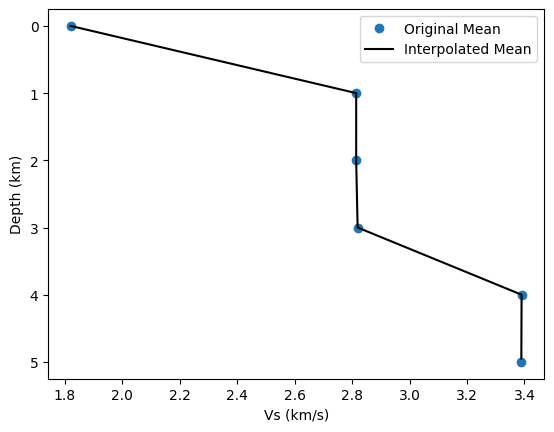

In [2]:
from scipy.interpolate import interp1d

# Assuming you have arrays 'depths' and 'mean_vel' for depth and average velocity
# Replace these arrays with your actual data
mean_vel=[1.820, 2.814, 2.814, 2.819, 3.39, 3.389]
depths = np.array(range(0,6,1))
depth_interval=0.05

# Define the interpolation function
f = interp1d(depths, mean_vel, kind='linear')

# Define new depth values with interval of 0.05
depths_new = np.arange(depths.min(), depths.max(), depth_interval)
mean_vel_interp = f(depths_new)

# Create the velocity model array in the desired format
velocity_model = np.array([
    [depth_interval, vel * 1.728, vel, 2.0] for vel in mean_vel_interp
])

# Print the formatted array with commas
for row in velocity_model:
    print(f"[{row[0]:.4f}, {row[1]:.2f}, {row[2]:.2f}, {row[3]:.1f}],")
    
# Plot the original and interpolated data
plt.plot(mean_vel, depths, 'o', label='Original Mean')
plt.plot(mean_vel_interp, depths_new, '-', label='Interpolated Mean', color='black')
plt.gca().invert_yaxis()
plt.xlabel("Vs (km/s)")
plt.ylabel("Depth (km)")
plt.legend()
plt.show()


In [5]:
from disba import PhaseDispersion
# Periods must be sorted starting with low periods
t = np.logspace(-2, 1, 100)

# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves
# Fundamental mode corresponds to mode 0
pd = PhaseDispersion(*velocity_model.T)
cpr = [pd(t, mode=i, wave="rayleigh") for i in range(1)]
cpl = [pd(t, mode=i, wave="love") for i in range(1)]


In [6]:
from disba import PhaseSensitivity

ps = PhaseSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr = [ps(0.5, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl = [ps(0.5, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)

In [7]:
ps = PhaseSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr4 = [ps(0.25, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl4 = [ps(0.25, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps

In [8]:
ps = PhaseSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr8 = [ps(0.125, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl8 = [ps(0.125, mode=0, wave="love", parameter=parameter) for parameter in parameters]

# ps

In [9]:
#print(velocity_model.T[:])
dep=np.zeros(len(velocity_model))
tmp=0.

for k in range(1,len(velocity_model)):
    dep[k]=tmp+velocity_model.T[0][k]
    tmp=dep[k]
    #print(k, dep[k],tmp)

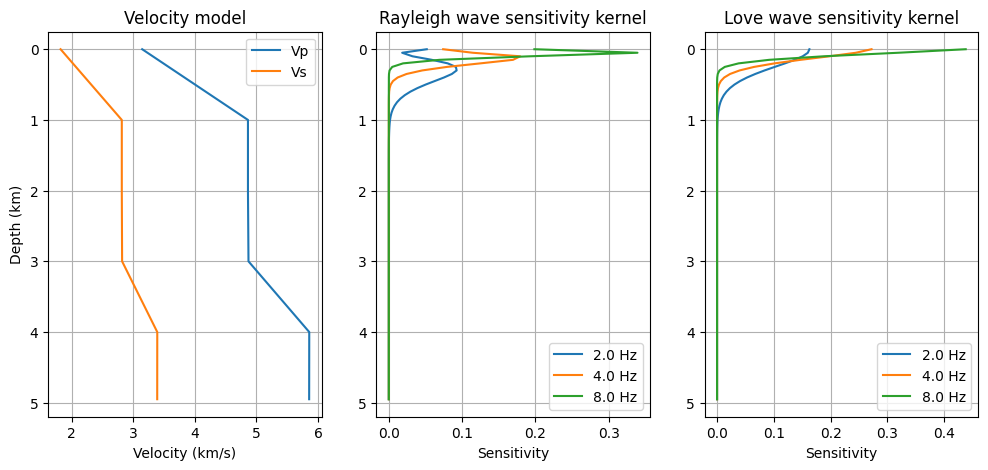

In [10]:

fig,ax = plt.subplots(1,3, figsize=(12,5))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

k=2
ax[0].set_title("Velocity model")
ax[0].set_xlabel("Velocity (km/s)")
ax[0].set_ylabel("Depth (km)")
ax[0].plot(velocity_model.T[1],dep,label="Vp")
ax[0].plot(velocity_model.T[2],dep,label="Vs")
ax[1].plot(skr[k].kernel,  skr[k].depth , label=str(1/skr[k].period)+" Hz" )
ax[1].plot(skr4[k].kernel, skr4[k].depth, label=str(1/skr4[k].period)+" Hz" )
ax[1].plot(skr8[k].kernel, skr8[k].depth, label=str(1/skr8[k].period)+" Hz" )
ax[1].set_xlabel("Sensitivity")
ax[1].set_title("Rayleigh wave sensitivity kernel")

ax[2].plot(skl[k].kernel,  skl[k].depth , label=str(1/skl[k].period)+" Hz" )
ax[2].plot(skl4[k].kernel, skl4[k].depth, label=str(1/skl4[k].period)+" Hz" )
ax[2].plot(skl8[k].kernel, skl8[k].depth, label=str(1/skl8[k].period)+" Hz" )
ax[2].set_xlabel("Sensitivity")
ax[2].set_title("Love wave sensitivity kernel")

ax[0].legend()
ax[1].legend()
ax[2].grid(True)
ax[2].legend()
ax[1].grid(True)
ax[0].grid(True)